In [485]:
import urllib2
import ast 
import matplotlib
import matplotlib.pyplot as plt
import time
from datetime import datetime
import pickle
import pandas as pd
import mpld3
from mpld3 import plugins, utils

%matplotlib inline

In [217]:
def name(name):
    if 'uberX' == name:
        return 'uberx'
    elif 'SUV' in name:
        return 'suv'
    elif 'UberBlack' in name:
        return 'black'
    elif 'Sedan' == name:
        return 'sedan'
    else: 
        return name

In [218]:
class Uber(object):
    def __init__(self, list):            
        self.uberx_high = [d['uberx']['high'] for d in list]
        self.uberx_low = [d['uberx']['low'] for d in list]
        self.uberx_surge = [d['uberx']['surge'] for d in list]
        self.suv_high = [d['suv']['high'] for d in list]
        self.suv_low = [d['suv']['low'] for d in list]
        self.suv_surge = [d['suv']['surge'] for d in list]
        self.black_high = [d['black']['high'] for d in list]
        self.black_low = [d['black']['low'] for d in list]
        self.black_surge = [d['black']['surge'] for d in list]
        self.sedan_high = [d['sedan']['high'] for d in list]
        self.sedan_low = [d['sedan']['low'] for d in list]
        self.sedan_surge = [d['sedan']['surge'] for d in list]
    

In [237]:
def uber_web(url):
    webpage = urllib2.urlopen(url)
    data_json = webpage.read()
    data = ast.literal_eval(data_json)
    instance=data.values()[0]
    return dict([[name(key['display_name']),{'high':key['high_estimate'],'low':key['low_estimate'],\
                                             'dist':key['distance'],'surge':key['surge_multiplier'],\
                                             'time':datetime.now()}] for key in instance])

In [240]:
###  location latitude and longitude
sanamlung=[13.75509, 100.49303]
paragon=[13.74448, 100.53309] 
kasert=[13.84559, 100.56525]
seacon=[13.69424, 100.64782]

In [ ]:
#only run this one - l1, l2, l3 is continously collected
numtime=20
for i in range(numtime):
    if i>0 and i<numtime-1:
        print 'sleep for 5 mins'
        time.sleep(300)
    u1=uber_web(url_1)
    u2=uber_web(url_2)
    u3=uber_web(url_3)
    l1.append(u1)
    l2.append(u2)
    l3.append(u3)
    print 'done:'+str(i)
    

[x['uberx']['time'] for x in l1]

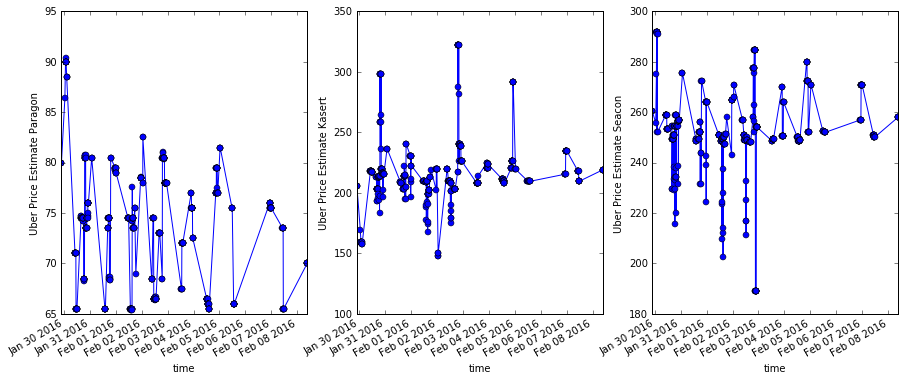

In [581]:
mpld3.disable_notebook()
import numpy as np

lu1=Uber(l1)
lu2=Uber(l2)
lu3=Uber(l3)

#dates = matplotlib.dates.date2num([x['uberx']['time'] for x in l1])
fig, ax = plt.subplots(1, 3, figsize=(15,6))
fig.autofmt_xdate()

ax[0].plot([x['uberx']['time'] for x in l1], (np.array(lu1.uberx_high)+np.array(lu1.uberx_low))/2./np.array(lu1.uberx_surge), marker='o')
#ax[0].plot([x['black']['time'] for x in l1], [x['black']['high'] for x in l1], marker='o')
ax[0].set_xlabel('time')
ax[0].set_ylabel('Uber Price Estimate Paragon')

ax[1].plot([x['uberx']['time'] for x in l2], (np.array(lu2.uberx_high)+np.array(lu2.uberx_low))/2./np.array(lu2.uberx_surge), marker='o')
#ax[1].plot([x['black']['time'] for x in l2], [x['black']['high'] for x in l2], marker='o')
ax[1].set_xlabel('time')
ax[1].set_ylabel('Uber Price Estimate Kasert')

ax[2].plot([x['uberx']['time'] for x in l3], (np.array(lu3.uberx_high)+np.array(lu3.uberx_low))/2./np.array(lu3.uberx_surge), marker='o')
#ax[2].plot([x['black']['time'] for x in l3], [x['black']['high'] for x in l3], marker='o')
ax[2].set_xlabel('time')
ax[2].set_ylabel('Uber Price Estimate Seacon')

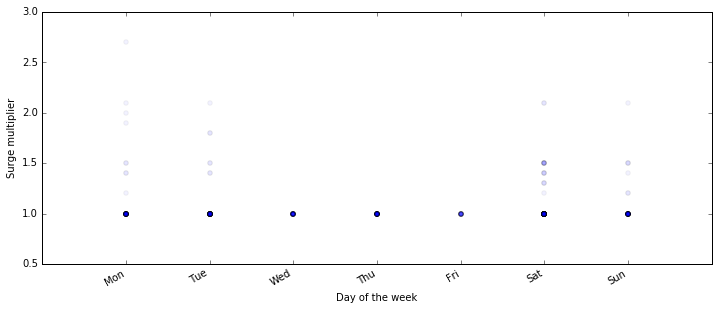

In [582]:
mpld3.disable_notebook()
fig, ax = plt.subplots(1, 1, figsize=(12,5))
fig.autofmt_xdate()
x_num=[0,1,2,3,4,5,6,7]
x_label=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

ax.scatter([x['uberx']['time'].weekday() for x in l1]\
        , lu1.uberx_surge, marker='o', alpha=0.05)
ax.set_xticks(x_num)
ax.set_xticklabels(x_label)
ax.set_ylabel('Surge multiplier')
ax.set_xlabel('Day of the week')

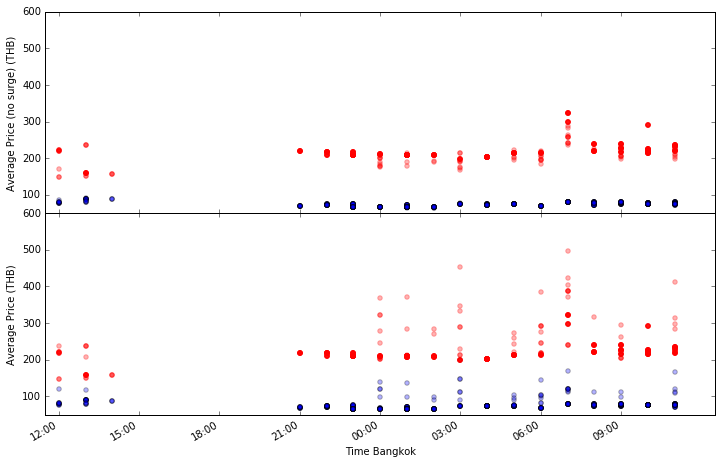

In [583]:
mpld3.disable_notebook()
fig, ax = plt.subplots(2, 1, figsize=(12,8))
fig.subplots_adjust(hspace=0.00)
fig.autofmt_xdate()
x_num=[0,3,6,9,12,15,18,21]
x_label=["12:00","15:00","18:00","21:00","00:00","03:00","06:00","09:00"]

ax[0].scatter([x['uberx']['time'].time().hour for x in l1]\
        ,(np.array(lu1.uberx_high)+np.array(lu1.uberx_low))/2./np.array(lu1.uberx_surge), marker='o',alpha=0.3)
ax[0].scatter([x['uberx']['time'].time().hour for x in l1]\
        ,(np.array(lu2.uberx_high)+np.array(lu2.uberx_low))/2./np.array(lu2.uberx_surge), marker='o',color='red',alpha=0.3)
ax[0].axis([-0.5,24.5,50,600])
ax[0].set_xticks(x_num)
ax[0].set_xticklabels(x_label)
ax[0].set_ylabel('Average Price (no surge) (THB)')

ax[1].scatter([x['uberx']['time'].time().hour for x in l1]\
        ,(np.array(lu1.uberx_high)+np.array(lu1.uberx_low))/2., marker='o',alpha=0.3)
ax[1].scatter([x['uberx']['time'].time().hour for x in l1]\
        ,(np.array(lu2.uberx_high)+np.array(lu2.uberx_low))/2., marker='o',color='red',alpha=0.3)
ax[1].axis([-0.5,24.5,50,600])
ax[1].set_xticks(x_num)
ax[1].set_xticklabels(x_label)
ax[1].set_ylabel('Average Price (THB)')
ax[1].set_xlabel('Time Bangkok')

#plt.tight_layout()

In [584]:
#save all interested variables into pickle
with open('uber.pickle', 'wb') as f:
    pickle.dump([lu1, lu2, lu3], f)

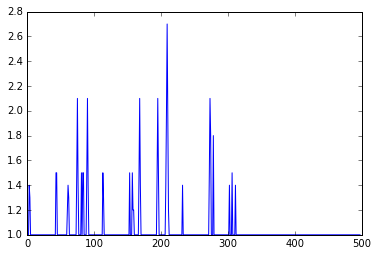

In [585]:
with open('uber.pickle') as f:
    a1, a2, a3 = pickle.load(f)
    
plt.plot(a1.uberx_surge)

### Plot 

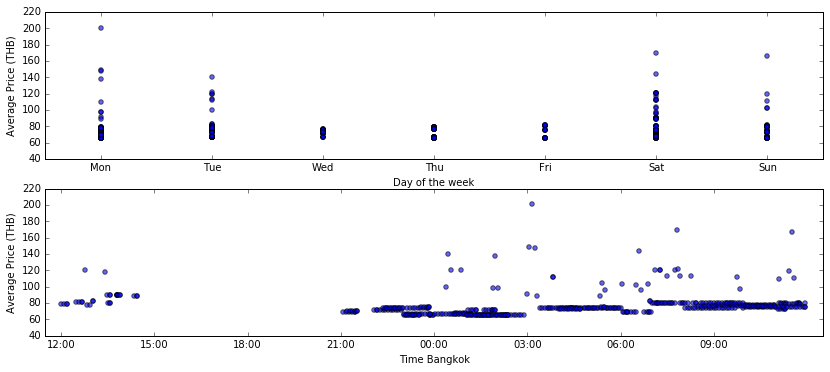

In [587]:
columns = ['day','time','surge','price']
index=range(0,len(l1))
df= pd.DataFrame(index=index, columns=columns)

df['day']=[x['uberx']['time'].weekday() for x in l1]
df['time']=[x['uberx']['time'].time().hour+x['uberx']['time'].time().minute/60.+x['uberx']['time'].time().second/3600. for x in l1]
df['surge']=lu1.uberx_surge
df['price']=(np.array(lu1.uberx_high)+np.array(lu1.uberx_low))/2.


mpld3.enable_notebook()
#mpld3.disable_notebook()


fig, ax = plt.subplots(2, 1, figsize=(12,6))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95)#,hspace=0.1, wspace=0.1)
#fig.autofmt_xdate()

x_num=[0,1,2,3,4,5,6,7]
x_label=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
point=ax[0].scatter(df.day, df.price, marker='o', alpha=0.6)
ax[0].set_xticks(x_num)
ax[0].set_xticklabels(x_label)
ax[0].set_ylabel('Average Price (THB)')
ax[0].set_xlabel('Day of the week')
ax[0].axis([-0.5,6.5,40,220])



x2_num=[0,3,6,9,12,15,18,21]
x2_label=["12:00","15:00","18:00","21:00","00:00","03:00","06:00","09:00"]

point=ax[1].scatter(df.time, df.price, marker='o',alpha=0.6)
ax[1].axis([-0.5,24.5,40,220])
ax[1].set_xticks(x2_num)
ax[1].set_xticklabels(x2_label)
ax[1].set_ylabel('Average Price (THB)')
ax[1].set_xlabel('Time Bangkok')
#plt.tight_layout()
plugins.connect(fig, plugins.LinkedBrush(point))

In [100]:
list=[[x['display_name'], x['high_estimate'], x['low_estimate'], x['distance'], x['surge_multiplier']] for x in instance] 

In [106]:
list

[['uberX', 71, 59, 3.53, 1.0],
 ['Nearest UberBlack', 184, 150, 3.53, 1.0],
 ['Sedan', 184, 150, 3.53, 1.0],
 ['SUV\\/MPV', 184, 150, 3.53, 1.0]]

In [174]:
uber=dict([[name(key['display_name']), {'high':key['high_estimate'],'low':key['low_estimate'],'dist':key['distance'],\
                        'surge':key['surge_multiplier'],'time':str(datetime.now())}] for key in instance])

uber2=dict([[name(key['display_name']), {'high':100,'low':0,'dist':key['distance'],\
                        'surge':key['surge_multiplier'],'time':str(datetime.now())}] for key in instance])

l=[uber,uber2] 

[d['uberx']['high'] for d in l]

[71, 100]

### Addition information about datetime package

In [ ]:
#Find weekday
x['uberx']['time'].weekday()

#Find time
x['uberx']['time'].time().hour+x['uberx']['time'].time().minute/60.+x['uberx']['time'].time().second/3600. 